# Group exam
By Georg Risøy, Lea Bjørnemo and Ninad Hagi

# Reveiwing dataset 

In reviewing the dataset, we've identified columns that appear to be irrelevant for our analysis. The columns "Message ID," "Message timestamp," "Message date," and "Message time" seem to hold information related to when the data is entered, which is not crucial for our purposes.

Additionally, columns such as "Start time," "Start time," "End time," "End time," and "Catch area" will be replaced with a consolidated "Duration" column. However, we acknowledge that the time of day might still be relevant for understanding fish behavior.

We've opted to use "Location start" and "Location stop" instead of "Main area start," "Main area end," "Main area start (code)," and "Main area end (code)" since all these columns seem to be interconnected.

Upon further examination, we noticed that "Location start (code)" and "Location stop (code)" contained numerous empty fields. To address this, we recommend using start position latitude/longitude and stop position latitude/longitude, which should provide more meaningful data compared to the (code) fields, likely resulting in higher precision.

Another issue arises with the "Bruttotonnasje" column, where a significant number (approximately 230,000) of entries are missing. Consequently, we have decided to drop both "Gross tonnage" columns in favor of relying on boat length and width, which offer more comprehensive information.

Similarly, we are simplifying the dataset by using only the "Vessel length" column instead of both 'Length group' and 'Length group (code)'. Although this may introduce some complexity in categorizing various vessel types, it should contribute to better precision in our analysis.

Finally, to streamline the data further, we have chosen to focus on the "Hovedart FAO" column, focusing only on 'Torsk' and 'Sei', and by using Hovedart FAO we use only the boats where these where the biggest catch for the boat.

In [1]:
#Hvilke kolonner er irrelevante?
#"Melding ID", "Meldingstidpunkt", "Meldingsdato", "Meldingsklokkeslett" Det meste med når dette er lagt inn vil ikke ha noe å si.
#"Starttidpunkt", "Startklokkeslett", "Stopptidspunkt", "Stoppklokkeslett", "Fangstår" Vil erstattes med bare "Varighet", men kanskje har noe å si med åssen fisken oppfører seg natt/dag.
#"Hovedområde start", "Hovedområde stopp", "Hovedområde start (kode)", "Hovedområde stopp (kode)" Bruker heller Lokasjon stopp og start ettersom alle de ser ut til å være tilknyttet.
"""
Når det i tillegg sjekket for NaN lenger nede i koden, ser man at "Lokasjon start (kode)" og "Lokasjon stopp (kode)" hadde flere tomme felter. Derfor vil
det være mer gunstig og bruke startposisjon bredde/lengde og samme med stopp. Dette vil gir mer data enn å bruke (kode), men vil trolig og gi en høyere 
presisjon.
"""
#Problem med også "Bruttotonnasje" med veldig mange(ca 230000) NaN derfor droppe begge "Bruttotonnasje", ettersom vi har mange fler med båt lengde og bredde.
#Eksempelhvis samme med 'Lengdegruppe' og 'Lengdegruppe (kode)' brukes bare 'Fartøylengde'. Kan gi flere ulike farttøy som blir mer komplisert data, men bidra bedre presisjon
#Alt av unødvendig art, vi valgte Art FAO og fjernet alle andre art typer.


'\nNår det i tillegg sjekket for NaN lenger nede i koden, ser man at "Lokasjon start (kode)" og "Lokasjon stopp (kode)" hadde flere tomme felter. Derfor vil\ndet være mer gunstig og bruke startposisjon bredde/lengde og samme med stopp. Dette vil gir mer data enn å bruke (kode), men vil trolig og gi en høyere \npresisjon.\n'

### Impoting and reading 
Reading and printing out the first 5 lines 
Using sep=';' because in the csv file it is split with ";"

In [2]:
# Imports for models 
# matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# KNN 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
# Deep learning 
import tensorflow as tf 
from tensorflow import keras

c:\Users\47476\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv', sep=';')
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


# NaN (Missing Values):

When we check for NaN values we can se the context between the colons. With this knowlage we can easaly see if we should drop the rows with NaN. We also see what colons that are worth using. 

In [4]:

nan_count = df.isna().sum()

print(nan_count)

#Defining irrelevant colons so they are easier to manage and delete if needed 
irrelevante_col = ['Melding ID', 'Meldingstidspunkt', 'Meldingsdato', 'Meldingsklokkeslett','Starttidspunkt', 'Startklokkeslett', 'Stoppdato',
                   'Stopptidspunkt', 'Stoppklokkeslett','Hovedområde start', 'Hovedområde stopp', 'Hovedområde start (kode)', 'Fangstår',
                   'Hovedområde stopp (kode)', 'Lokasjon start (kode)', 'Lokasjon stopp (kode)', 'Bruttotonnasje 1969', 'Bruttotonnasje annen',
                   'Lengdegruppe (kode)', 'Lengdegruppe', 'Hovedart FAO (kode)', 'Hovedart - FDIR (kode)', 'Art FAO (kode)', 
                   'Art - FDIR (kode)', 'Art FAO', 'Art - gruppe (kode)', 'Art - gruppe', 'Redskap FAO (kode)', 'Redskap FAO', 'Redskap FDIR']



Melding ID                       0
Meldingstidspunkt                0
Meldingsdato                     0
Meldingsklokkeslett              0
Starttidspunkt                   0
Startdato                        0
Startklokkeslett                 0
Startposisjon bredde             0
Startposisjon lengde             0
Hovedområde start (kode)      2001
Hovedområde start             4124
Lokasjon start (kode)         2001
Havdybde start                   0
Stopptidspunkt                   0
Stoppdato                        0
Stoppklokkeslett                 0
Varighet                         0
Fangstår                         0
Stopposisjon bredde              0
Stopposisjon lengde              0
Hovedområde stopp (kode)      1962
Hovedområde stopp             4124
Lokasjon stopp (kode)         1962
Havdybde stopp                   0
Trekkavstand                    24
Redskap FAO (kode)               0
Redskap FAO                    188
Redskap FDIR (kode)            188
Redskap FDIR        

### Removing Colums 

#Removing the coloms that are unneceasrry with pandas drop 
Using a loop, you iterate through the list of irrelevant columns and drop them from the DataFrame(df). The axis=1 parameter indicates that you are dropping columns.


#Dropper NaN istede for eksmepelhvis å erstatte mean ettersom ikke bruke mean på eksempel hvis redskap og koder
#Vi dropper også NaN fordi er mindre enn 5000 NaN av resterende kolonner, og vi vil heller ha en klarere data

In [5]:
for col in irrelevante_col:
     df = df.drop(col, axis=1)

#Dropping Rows with NaN     
df.dropna()
#Displaying the First 5 Rows
df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
0,31.12.2017,"-60,35","-46,133",-2740,1440,"-60,4","-46,15",-805,5649.0,53.0,Antarktisk krill,Antarktisk krill,706714.0,"19,87","133,88"
1,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Hyse,9594.0,"12,6","56,8"
2,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Torsk,8510.0,"12,6","56,8"
3,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Blåkveite,196.0,"12,6","56,8"
4,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Sei,134.0,"12,6","56,8"


Acknowledging potential data loss, we opted to remove rows with NaN values instead of imputation methods, given the dataset's characteristics.

### Why are we dropping 

It's worth noting that dropping rows with NaN values might lead to a loss of data. We have consider other methods, such as filling NaNs with mean, median, or a specific value, depending on the nature of the data. But we chose to remove them. 

The code drops columns using irrelevante_col to streamline the dataset for analysis. Columns are removed if they are irrelevant, have many missing values, contain redundant information, or exhibit inconsistencies. The decision is tailored to the analysis goals, aiming for a cleaner dataset that meets specific requirements and enhances overall data quality.

### Visulization of NaN values 

We are cleaning and preparing the data for it to be used. Here is a visulasation of a bar chart that visually represents the impact of dropping rows with missing values (NaN) in our DataFrame. 
We see that the count of missing values significantly decreases after dropping rows, it indicates that this operation is effective in reducing missing data. If there was not a masjor change it can be considered effective in maintaining data integrity. But as we can see it was amsrat move. 
Dropping rows can also be computationally efficient, especially our dataset is large and the proportion of rows with missing values is relatively small. So even of there was a lot of data that is not used now it is a small amount compared to the whole dataset. 
Of couse dropping values and its outcome depends on the dataset but considering this exaple we thought the smartest move was to remove to remove the values. 

The significant reduction in missing values post-removal indicates the effectiveness of this operation with minimal impact on data integrity.
The computational efficiency of dropping rows is highlighted, especially for large datasets, where the loss is negligible compared to the dataset's overall size.

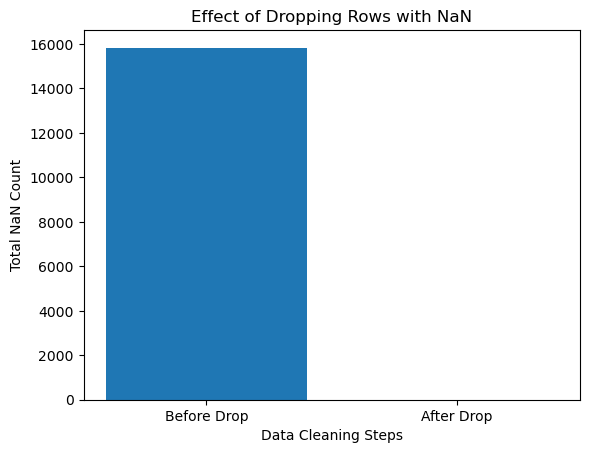

In [6]:
import matplotlib.pyplot as plt

# Get NaN counts before and after dropping rows
initial_nan_count = df.isna().sum()
df.dropna(inplace=True)
final_nan_count = df.isna().sum()

# Plot the counts
plt.bar(['Before Drop', 'After Drop'], [initial_nan_count.sum(), final_nan_count.sum()])
plt.xlabel('Data Cleaning Steps')
plt.ylabel('Total NaN Count')
plt.title('Effect of Dropping Rows with NaN')
plt.show()


Calculating and printing the count of occurrences for each unique value in the 'Art - FDIR' column of the DataFrame. It helps provide insights into the distribution of different values within that specific column.

In [7]:
counts = df['Hovedart FAO'].value_counts()

print(counts)

Hovedart FAO
Torsk                   86058
Sei                     66287
Dypvannsreke            36977
Hyse                    28166
Lange                   13387
                        ...  
Sandflyndre                 3
Makrellstørje               2
Various squids nei *        2
Blåhval                     1
Annen laksefisk             1
Name: count, Length: 67, dtype: int64


# Fish types and why we chose the fish we did 
Concentrating on the "Art FAO" column, we excluded other species, prioritizing the analysis of predominant fish types for accuracy.
Here you can see a visulasation of the different fish types. As you can see there is a significant difference between the fishes. To get the best accuracy and values we chose to focus on the fish with the most data. 
Making a barchart of all fish to visualize 

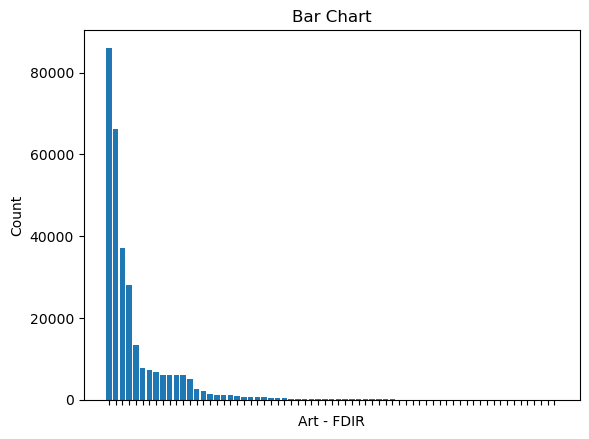

In [8]:
plt.bar(counts.index, counts.values)

plt.title("Bar Chart")

# Setting the X and Y labels
plt.xlabel('Art - FDIR')
plt.ylabel('Count')

# remove fish names(because to many names makes chart unreadable)
plt.gca().set_xticklabels([])

# Show bar chart of the count
plt.show()

Filtering the DataFrame (df) to include only rows where the value in the 'Art - FDIR' column is either 'Torsk' or 'Sei'.

In [9]:
df = df[(df['Hovedart FAO'] == 'Torsk') | (df['Hovedart FAO'] == 'Sei') | (df['Hovedart FAO'] == 'Dypvannsreke') | (df['Hovedart FAO'] == 'Hyse') | (df['Hovedart FAO'] == 'Lange')]


df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
1,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Hyse,9594.0,"12,6","56,8"
2,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Torsk,8510.0,"12,6","56,8"
3,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Blåkveite,196.0,"12,6","56,8"
4,30.12.2017,"74,885","16,048",-335,295,"74,914","15,969",-334,3970.0,51.0,Hyse,Sei,134.0,"12,6","56,8"
5,31.12.2017,"74,91","15,868",-403,267,"74,901","16,248",-277,11096.0,51.0,Hyse,Hyse,9118.0,"12,6","56,8"


Preprocessing specific columns in the DataFrame, converting them to strings, replacing commas with dots, converting them back to float, and mapping categorical values to numerical ones. This prepares the data for further analysis, ensuring the appropriate data types and formats are applied.

In [10]:
# Getting only 1 line from each boat to make the data clearer
df = df.loc[df['Hovedart FAO'] == df['Art - FDIR']]

float_columns = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
                'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FDIR (kode)', 
                'Rundvekt', 'Bredde', 'Fartøylengde'] 
# Convert the relevant columns to string
df[float_columns] = df[float_columns].astype(str)

# Replace , with . for all float columns
for col in float_columns:
    df[col] = df[col].str.replace(',', '.')

# Convert the columns back to float
df[float_columns] = df[float_columns].astype(float)
mapping = {'Torsk':  0, 'Sei':  1, 'Dypvannsreke': 2, 'Hyse': 3, 'Lange': 4}
df['Hovedart FAO'] = df['Hovedart FAO'].map(mapping)

df.head()

,Startdato,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde
1,30.12.2017,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8
5,31.12.2017,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8
11,31.12.2017,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8
17,31.12.2017,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8
19,01.01.2018,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1


Transforms the date information in the 'Startdato' column into a more useful format (numeric month values) and creates a new 'Month' column. It then drops the original date column, potentially to streamline the dataset or for other reasons depending on the specific analysis goals.

In [11]:
# The dates are changed into values for each month so they can be used 
# We are now able to use all the coloms in stead of using our defines features and adding there
df['Startdato'] = pd.to_datetime(df['Startdato'], format='%d.%m.%Y')
df['Month'] = df['Startdato'].dt.month
df = df.drop('Startdato', axis=1)
df.head()

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1


# Notes
We change from 'ART - FDIR' to 'Hovedart FAO' for clearer data where we only get the boat where the art is the biggest volume the boat caugth. Because of this not all the markdwons have been updated to the rigth saying.

Also by changing this we get clear data with no direct link to the answer, and still get good accuracy.


In [12]:
# Fjerna features siden vi hadde 2 for like fisker, men kan legge tilbake flere featueres ettersom forskjellige båter fisker de forskjellige fiskene. VI FJERNA DE LIKE BÅTENE! 
# Ha med ART FDIR FOR Å SJEKKE mer nøye og om det er riktig

In [41]:
# Defining the features and target for every model
features = ['Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Varighet',
    'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 
    'Redskap FDIR (kode)', 'Rundvekt', 'Month']
X = df[features]
y = df['Hovedart FAO']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [42]:
# Scale data for every model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply the scaling transformation to the training data (X_train)
# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaling transformation to the test data (X_test)
# Transform the test data using the parameters learned from the training data
X_test_scaled = scaler.transform(X_test)

# KNN 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier with  3 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
predictions = knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8642745709828393


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      5103
           1       0.87      0.87      0.87      3693
           2       0.99      0.99      0.99      2674
           3       0.69      0.68      0.68      1497
           4       0.92      0.88      0.90       494

    accuracy                           0.86     13461
   macro avg       0.86      0.85      0.86     13461
weighted avg       0.86      0.86      0.86     13461



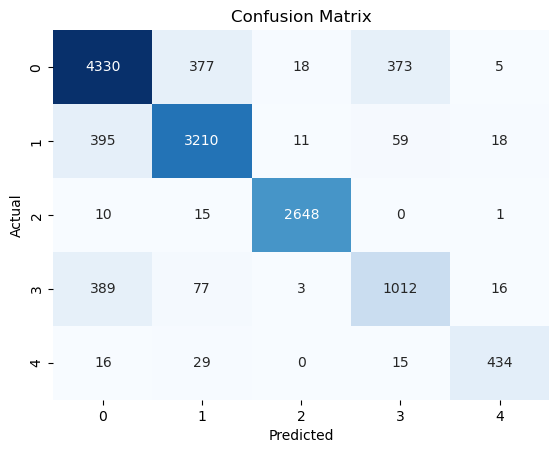

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)
cm = confusion_matrix(y_test, predictions)
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

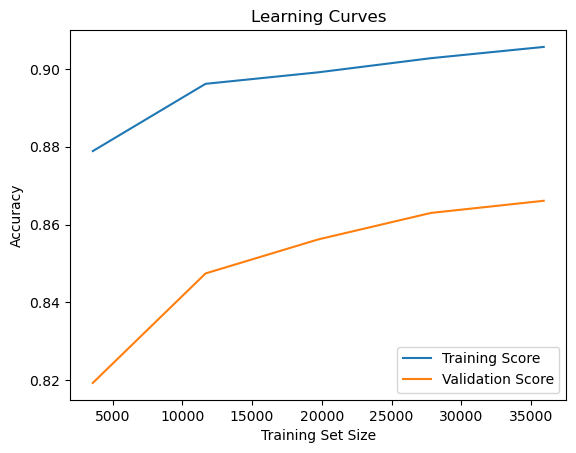

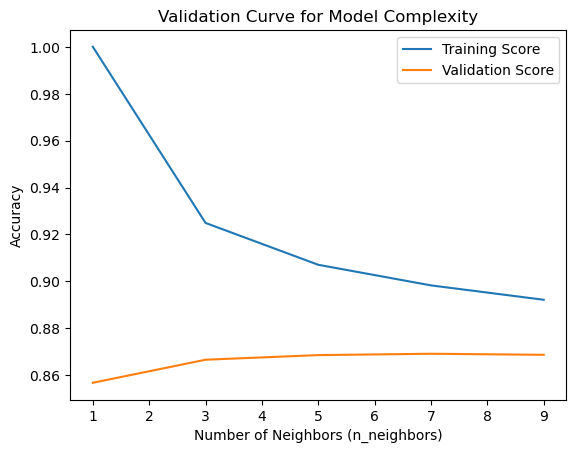

In [17]:
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Define the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Adjusted learning_curve parameters
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=3, scoring='accuracy', train_sizes=np.linspace(0.1,  1.0,  5)
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()


param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

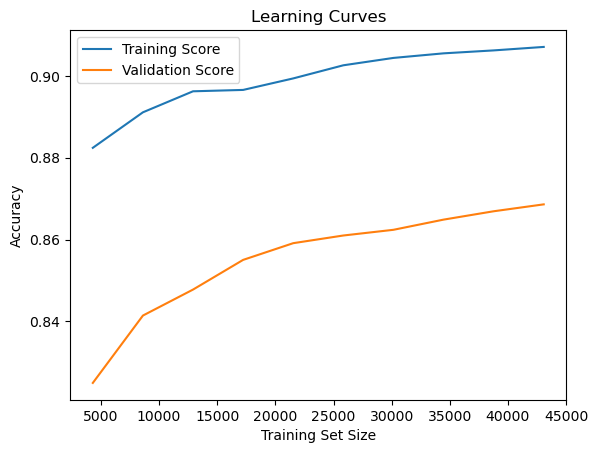

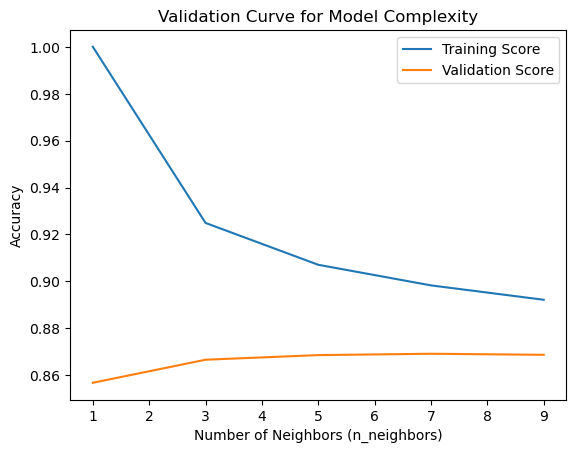

In [18]:
# Assessing Overfitting or Underfitting
from sklearn.model_selection import learning_curve, validation_curve

# 1. Learning Curves
train_sizes, train_scores, test_scores = learning_curve(
    knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves')
plt.show()

# 2. Validation Curve for Model Complexity
param_range = [1, 3, 5, 7, 9]  # Example values for n_neighbors
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train, param_name='n_neighbors',
    param_range=param_range, cv=5, scoring='accuracy'
)

plt.figure()
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Curve for Model Complexity')
plt.show()

 # its better to use roc auc with the 2 most frequent fishes because its better to use it on binary classification tasks. !!!!!!!!!!!!!!!!

# Deep Learning Keras

In [53]:
# One hot encoding for making categorical data equal as we have more date in some fishes than others. 
from tensorflow.keras.utils import to_categorical
labels_one_hot = to_categorical(y_train)
labels_one_hot_test = to_categorical(y_test)

In [64]:
# Build the Model
model = tf.keras.models.Sequential([
    keras.layers.Dense(500, activation='relu', input_shape=[len(features)]),
    keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dropout(0.2),  # Another dropout layer
    keras.layers.Dense(5, activation='softmax')  # Use 'softmax' for multi-class problems
])

In [65]:
import visualkeras
visualkeras.layered_view(model, to_file='model_visualization.png').show()  # saves the visualization as a PNG file and shows it

In [60]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
#Train og fit.
model.fit(X_train_scaled, labels_one_hot, epochs=10, validation_data=(X_test_scaled, labels_one_hot_test)) 

Epoch 1/10
1683/1683 [==============================] - 17s 9ms/step - loss: 0.5586 - accuracy: 0.7765 - val_loss: 0.4309 - val_accuracy: 0.8268
Epoch 2/10
1683/1683 [==============================] - 15s 9ms/step - loss: 0.4340 - accuracy: 0.8237 - val_loss: 0.4024 - val_accuracy: 0.8283
Epoch 3/10
1683/1683 [==============================] - 14s 8ms/step - loss: 0.4027 - accuracy: 0.8365 - val_loss: 0.3650 - val_accuracy: 0.8526
Epoch 4/10
1683/1683 [==============================] - 14s 8ms/step - loss: 0.3840 - accuracy: 0.8439 - val_loss: 0.3691 - val_accuracy: 0.8453
Epoch 5/10
1683/1683 [==============================] - 14s 8ms/step - loss: 0.3700 - accuracy: 0.8467 - val_loss: 0.3444 - val_accuracy: 0.8590
Epoch 6/10
1683/1683 [==============================] - 14s 8ms/step - loss: 0.3612 - accuracy: 0.8524 - val_loss: 0.3422 - val_accuracy: 0.8581
Epoch 7/10
1683/1683 [==============================] - 14s 8ms/step - loss: 0.3531 - accuracy: 0.8544 - val_loss: 0.3365 - val_ac

In [62]:
test_loss, test_acc = model.evaluate(X_test_scaled, labels_one_hot_test, verbose=2)
print('Test accuracy:', test_acc)

421/421 - 1s - loss: 0.3204 - accuracy: 0.8707 - 1s/epoch - 3ms/step
Test accuracy: 0.8706634044647217


In [57]:
# Difference betweened scaled and not scaled.
test_loss, test_acc = model.evaluate(X_test, labels_one_hot_test, verbose=2)
print('Test accuracy:', test_acc)

421/421 - 1s - loss: 2301.1541 - accuracy: 0.3526 - 1s/epoch - 3ms/step
Test accuracy: 0.35257411003112793
